# Combined Cycle Power Plant: Energy Output Prediction

This notebook explores and compares two regression models 

— **Linear Regression** and **Random Forest** 

— to predict the **energy output (PE)** 
of a combined cycle power plant based on ambient environmental features.

Dataset: `/kaggle/input/ccpp-energy-output/CCPP_data.csv`

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Load the Data**

In [6]:
import os
#finding dataset pathname

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ccpp-energy-output/CCPP_data.csv


In [8]:
import pandas as pd
# Load the dataset

data = pd.read_csv('/kaggle/input/ccpp-energy-output/CCPP_data.csv')
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


**Exploratory Data Analysis**

## Exploratory Data Analysis (EDA)

We begin by examining the dataset statistics, missing values, and correlations between features.

**Describe & Inspect Data**

In [9]:
data.describe()
data.isnull().sum()
data.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


**Correlation Matrix and Pairplot**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: >

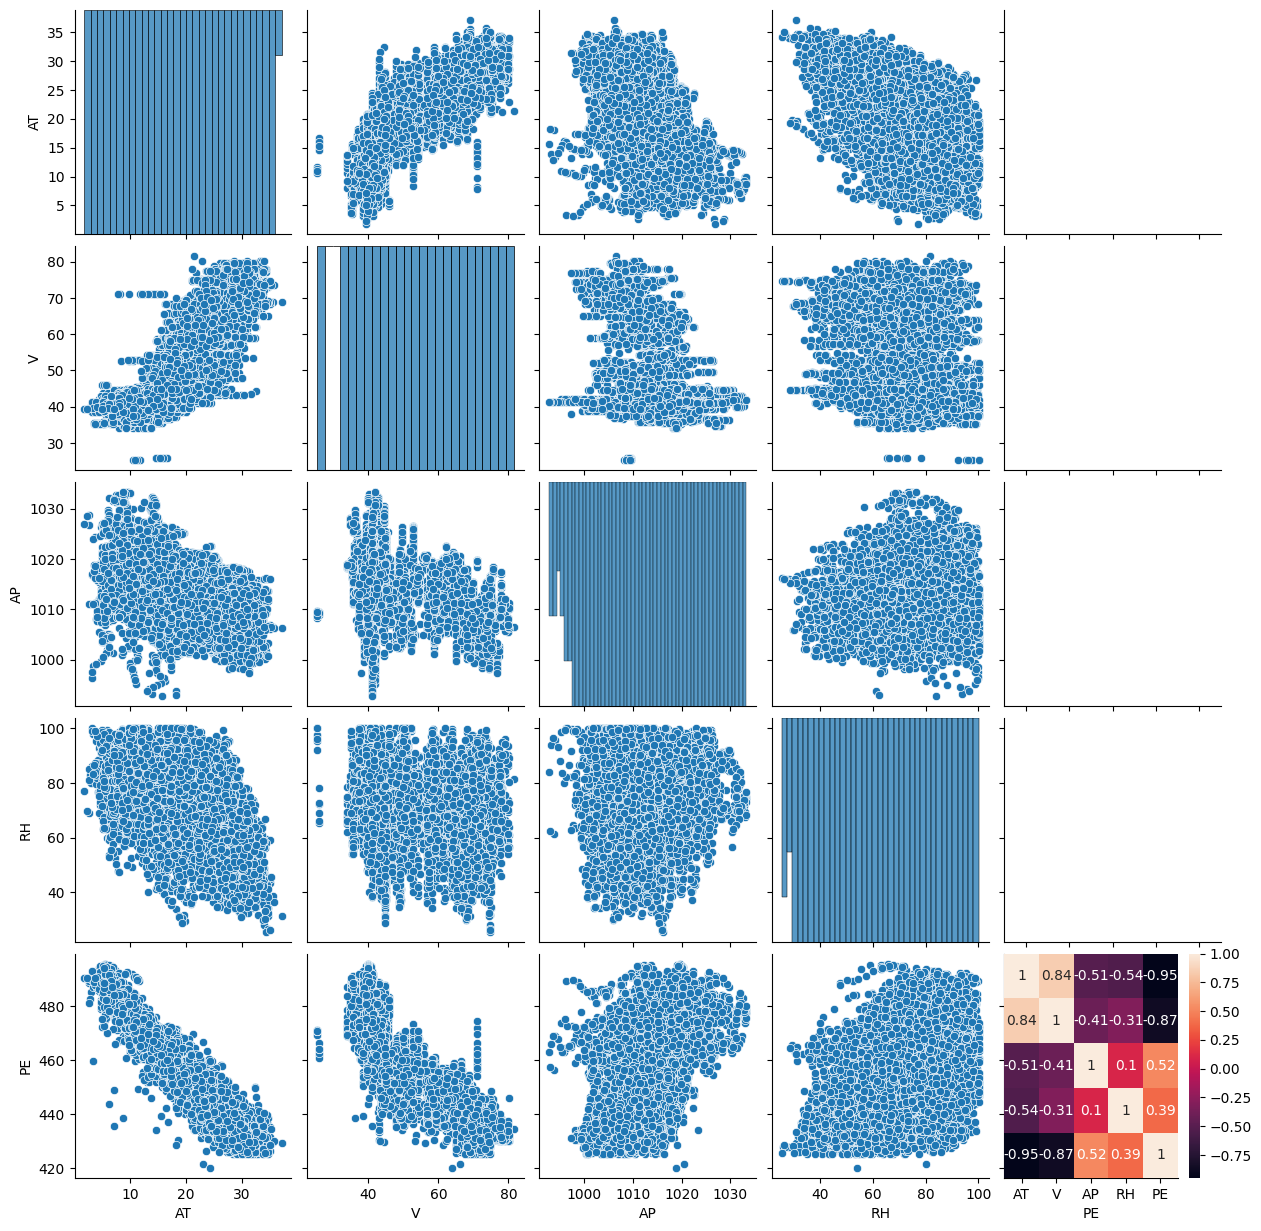

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data)
sns.heatmap(data.corr(), annot=True)

**Data Preprocessing**

## Data Preprocessing

We split the dataset into features (`X`) and target (`y`), 
and then apply an 80-20 train-test split.

**Train/Test Split**

In [12]:
from sklearn.model_selection import train_test_split

X = data.drop('PE', axis=1)
y = data['PE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Training**

## Model Training

We train two regression models:
- Linear Regression
- Random Forest Regressor

 **Train Models**

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Evaluation**

## Model Evaluation

We evaluate both models using:
- R² (coefficient of determination)
- Mean Squared Error (MSE)

**Evaluate Models**

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

for model, name in zip([lr, rf], ['Linear Regression', 'Random Forest']):
    preds = model.predict(X_test)
    print(f"{name} R²: {r2_score(y_test, preds):.3f}")
    print(f"{name} MSE: {mean_squared_error(y_test, preds):.3f}")


Linear Regression R²: 0.930
Linear Regression MSE: 20.274
Random Forest R²: 0.964
Random Forest MSE: 10.536


## Model Predictions vs Actuals

This plot shows how closely each model’s predictions match the actual energy output.

**Prediction Plot**

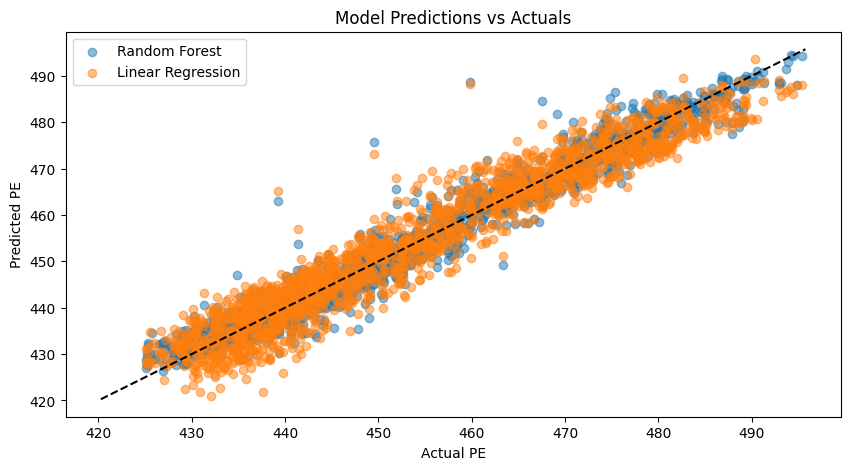

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, rf.predict(X_test), alpha=0.5, label='Random Forest')
plt.scatter(y_test, lr.predict(X_test), alpha=0.5, label='Linear Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel("Actual PE")
plt.ylabel("Predicted PE")
plt.legend()
plt.title("Model Predictions vs Actuals")
plt.show()


## Conclusion

- **Random Forest** outperforms Linear Regression in both R² and MSE, indicating better prediction accuracy.

- Environmental features such as **Ambient Temperature (AT)** and **Exhaust Vacuum (V)** are strongly correlated with **energy output (PE)**.

- Further improvements could involve hyperparameter tuning, cross-validation, or testing additional models like Gradient Boosting or XGBoost.

  

> This notebook demonstrates a foundational regression workflow using both basic and ensemble learning models on real-world power plant data.